In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from config import *
from time import time

## Channels, sample rate and duration in seconds

In [6]:
from pydub import AudioSegment

def read_audio_properties(file_path):
    audio_file = AudioSegment.from_mp3(file_path)
    return audio_file.channels, audio_file.frame_rate, int(audio_file.duration_seconds)

In [16]:
audio_properties = pd.DataFrame(columns=['file_name', 'channels', 'frame_rate', 'duration'])

start = time()
for member, label in MEMBER_TO_LABEL.items():
    print(member, end=' ')
    folder = f'data/{label}'
    file_list = os.listdir(folder)
    for file in file_list:
        channels, frame_rate, duration = read_audio_properties(f'{folder}/{file}')
        audio_properties = audio_properties.append({
            'file_name': f'{label}/{file.split(".")[0]}',
            'channels': channels,
            'frame_rate': frame_rate,
            'duration': duration
        }, ignore_index=True)
        
print(f'\nElapsed time: {time() - start:.2f}s')

Jin Suga J-Hope RM Jimin V Jungkook 

In [17]:
audio_properties['channels'].value_counts(normalize=True)

2    1.0
Name: channels, dtype: float64

In [18]:
audio_properties['frame_rate'].value_counts(normalize=True)

44100    1.0
Name: frame_rate, dtype: float64

In [19]:
audio_properties['duration'].value_counts(normalize=True)

5    0.764968
3    0.101274
4    0.084076
2    0.049682
Name: duration, dtype: float64

# Zero Crossing

In [2]:
df = pd.read_csv('features_mfcc12_down_zcr.csv')
df.shape

(1570, 15)

In [3]:
df.head()

,label,file_path,mfcc_12_01,zero_crossing,mfcc_12_02,mfcc_12_03,mfcc_12_04,mfcc_12_05,mfcc_12_06,mfcc_12_07,mfcc_12_08,mfcc_12_09,mfcc_12_10,mfcc_12_11,mfcc_12_12
0,0,data/0/AirPlane2_33.mp3,41.729389,7445,69.839131,10.275896,6.816580,6.744674,0.446081,2.895980,-0.241223,7.637722,1.650259,2.256014,7.582696
1,0,data/0/AirPlane2_34.mp3,52.914553,8786,66.459421,10.577664,6.400146,6.752702,-2.794768,6.017375,2.333186,4.221478,0.561384,4.402715,7.162423
2,0,data/0/AirPlane2_35.mp3,35.338507,4500,73.393745,12.248841,11.243745,8.273308,-4.327825,7.829953,4.093424,8.697121,3.708567,0.206613,3.843206
3,0,data/0/Awake_0.mp3,-237.019416,9491,69.871246,3.465463,9.919709,-5.280379,18.765350,-3.662801,-2.422792,5.066522,-5.671566,-1.780785,-7.702798
4,0,data/0/Awake_1.mp3,-237.983376,8413,65.310684,5.072967,15.970936,-2.818076,15.153391,2.507504,-0.286085,8.883162,-5.093361,2.048903,-5.920195


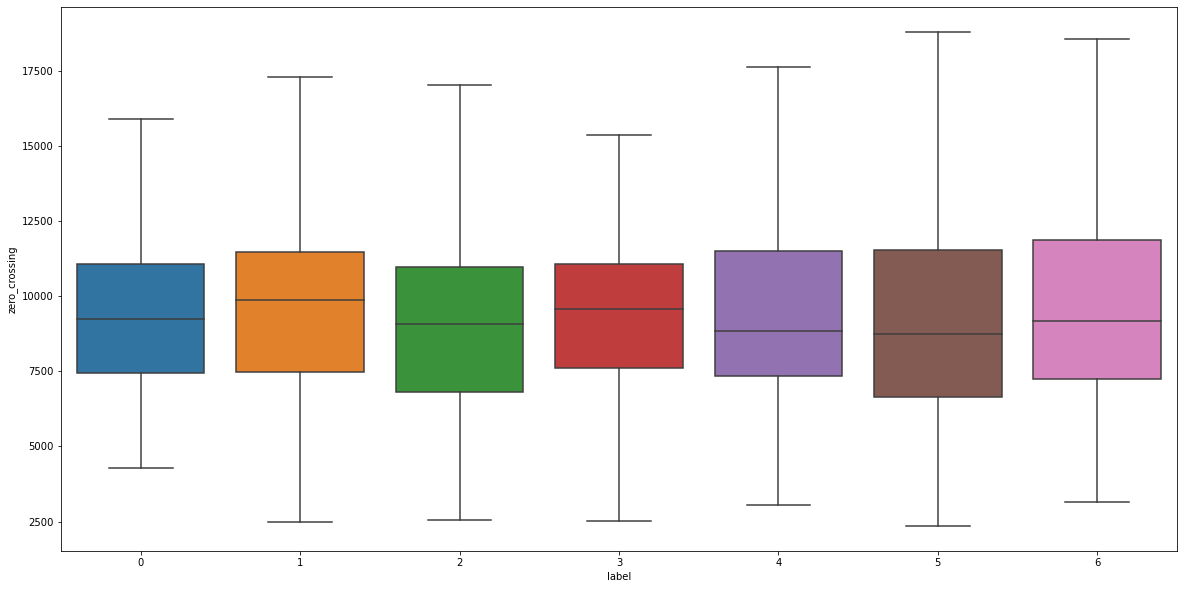

In [8]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='label', y='zero_crossing', data=df, showfliers=False)

# MFCC

## 2 members

In [2]:
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from librosa.feature import mfcc as MFCC
from librosa.display import specshow

In [5]:
n_mfcc = 12

song = '4Oclock'
mfcc_dict = {
    'RM': [], 'V': []
}

In [17]:
for member, label in MEMBER_TO_LABEL.items():
    track = [x for x in os.listdir(f'data/{label}') if x.startswith(song)]
    if len(track) == 0:
        continue
    for i in range(len(track)):
        audio, sample_rate = librosa.load(f'data/{label}/{track[i]}', sr=None)
        mfcc_feat = MFCC(audio, sr=sample_rate, n_mfcc=n_mfcc)
        mfcc_dict[member].append(mfcc_feat)

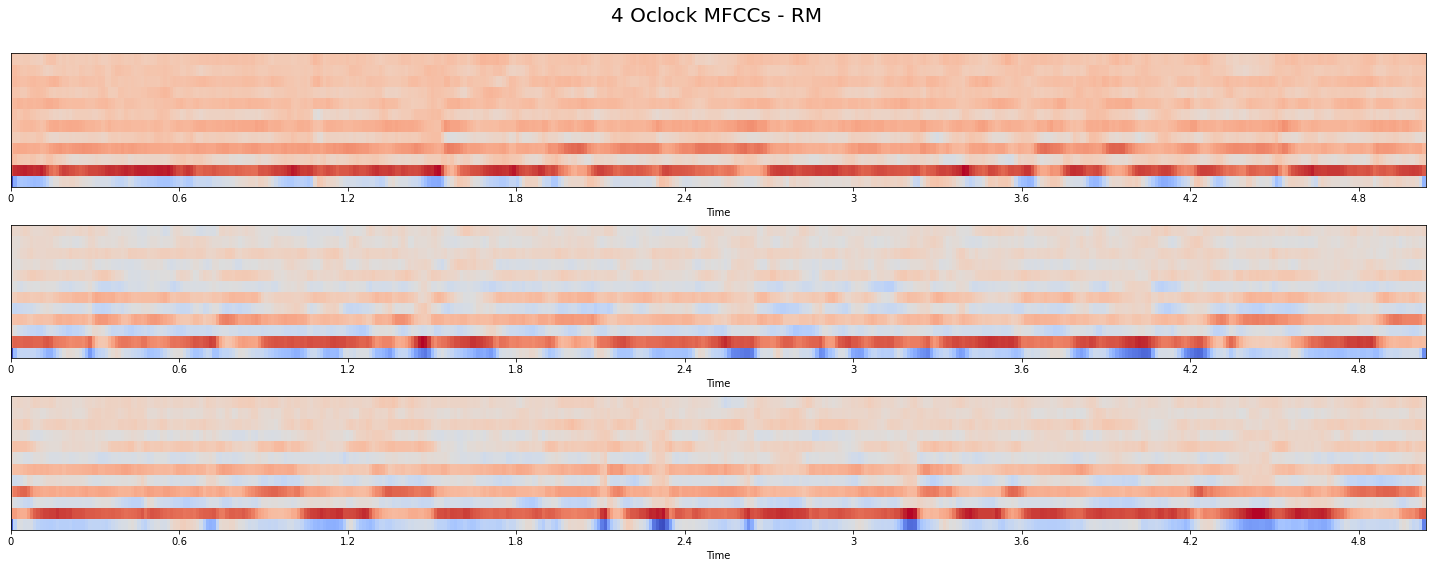

In [21]:
fig, ax = plt.subplots(3, 1, figsize=(20, 8))

for i in range(3):
    specshow(mfcc_dict['RM'][i], sr=44100, x_axis='time', ax=ax[i])

fig.tight_layout()
fig.suptitle('4 Oclock MFCCs - RM', fontsize=20)
plt.subplots_adjust(top=0.9)
plt.show()

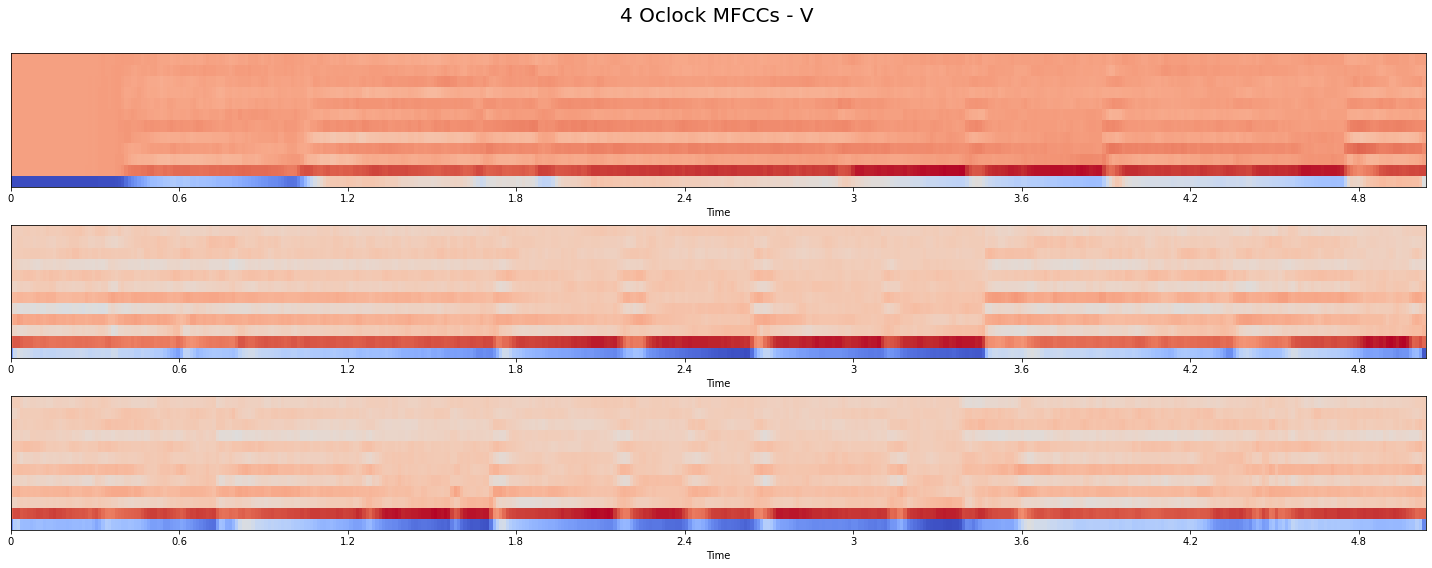

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(20, 8))

for i in range(3):
    specshow(mfcc_dict['V'][i], sr=44100, x_axis='time', ax=ax[i])

fig.tight_layout()
fig.suptitle('4 Oclock MFCCs - V', fontsize=20)
plt.subplots_adjust(top=0.9)
plt.show()

In [25]:
mfcc_dict['V'].mean(axis=1)

array([-215.54048829,  123.83650694,   -7.99329134,   31.86926631,
        -21.74044958,   23.93025457,   -1.13658948,    9.05221219,
        -16.17010173,    3.10275817,    0.39923478,   -2.55126779])

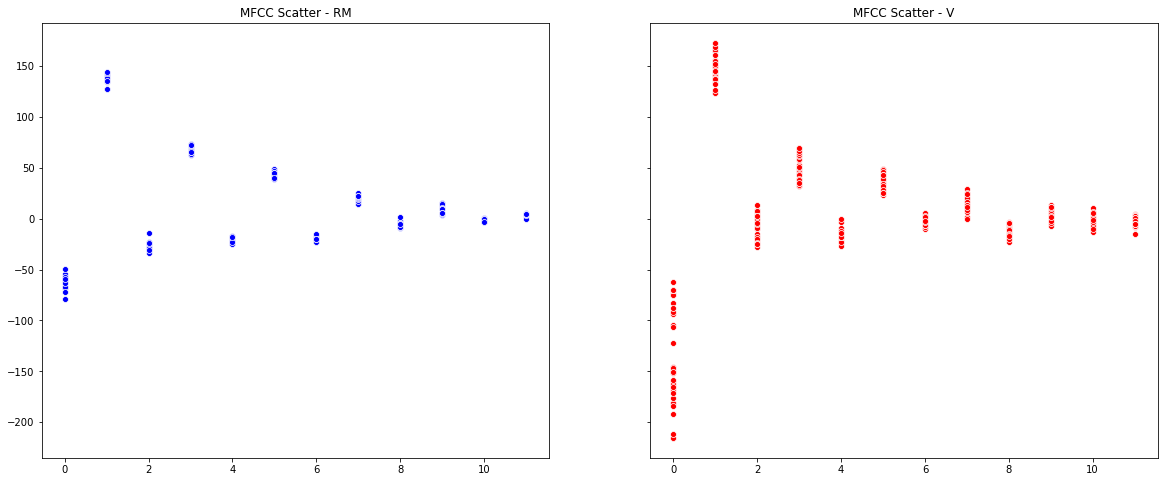

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

for i in range(len(mfcc_dict['RM'])):
    sns.scatterplot(x=list(range(12)), y=mfcc_dict['RM'][i].mean(axis=1), color='b', ax=ax[0])
    
for i in range(len(mfcc_dict['V'])):
    sns.scatterplot(x=list(range(12)), y=mfcc_dict['V'][i].mean(axis=1), color='r', ax=ax[1])

ax[0].set_title('MFCC Scatter - RM')
ax[1].set_title('MFCC Scatter - V')
    
plt.show()

## All members

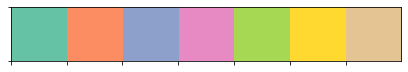

In [3]:
palette = sns.color_palette('Set2', 7)
sns.palplot(palette)

In [4]:
audio_feats = pd.read_csv('features_mfcc12.csv')
audio_feats.shape

(1570, 14)

In [6]:
mfcc_cols = [x for x in audio_feats.columns if x.startswith('mfcc')]
print(mfcc_cols)

['mfcc_12_01', 'mfcc_12_02', 'mfcc_12_03', 'mfcc_12_04', 'mfcc_12_05', 'mfcc_12_06', 'mfcc_12_07', 'mfcc_12_08', 'mfcc_12_09', 'mfcc_12_10', 'mfcc_12_11', 'mfcc_12_12']


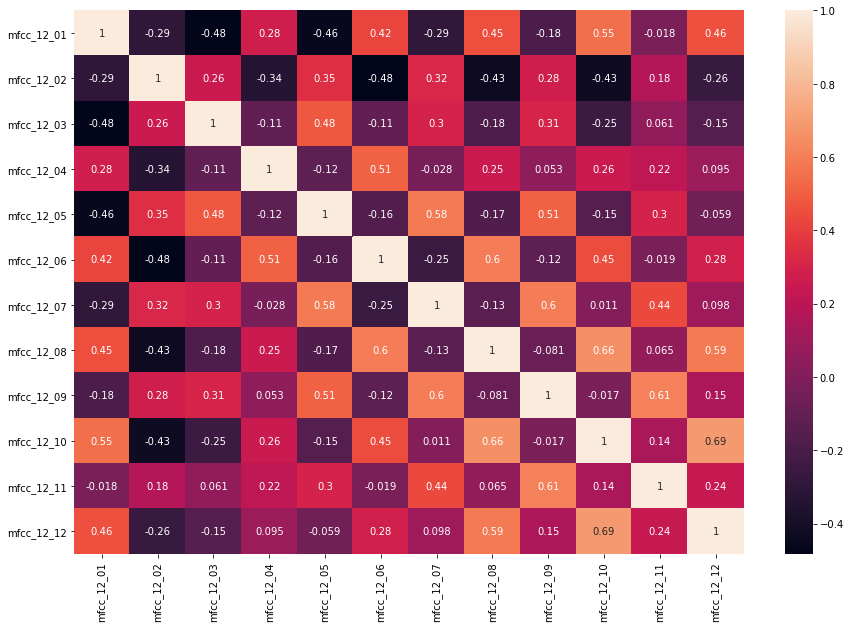

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(audio_feats[mfcc_cols].corr(), annot=True)